In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
data  = pd.read_csv('C:/Users/Srujan/Documents/Datasets/west_nile/train.csv',parse_dates=['Date'])
#test  = pd.read_csv('C:/Users/Srujan/Documents/Datasets/west_nile/test.csv',parse_dates=['Date'])
data.head(4)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0

In [3]:
data['date'] = data['Date']
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = [d.strftime('%b') for d in data.Date]
data.set_index('date',inplace=True)
#data.index = data.index.sort_values()

In [4]:
data.shape

(10506, 14)

In [5]:
data.head(4)

Date                                            Address  \
date                                                                       
2007-05-29 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           Species  Block           Street  Trap  \
date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   

                       AddressNumberAndStreet   Latitude  Longitude  \
date                                                                  
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   

            AddressAccuracy  NumMosquitos  WnvPresent  year month  
date                                                               
2007-05-29                9             1           0  2007   May  
2007-05-29                9             1           0  2007   May  
2007-05-29                9             1           0  2007   May  
2007-05-29                8             1           0  2007   May

## Seasonality

If you see the seasonality, more number of mosquitoes were trapped in the month of July and August. This is the rainy season.

In [6]:
data.groupby('month')['NumMosquitos'].count()

month
Aug    3751
Jul    2606
Jun    1571
May      84
Oct     276
Sep    2218
Name: NumMosquitos, dtype: int64

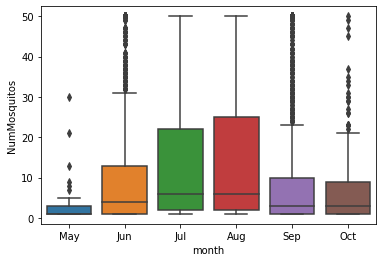

In [7]:
sns.boxplot(x='month', y='NumMosquitos', data=data)

More number of mosquitoes were trapped in the year 2007.

In [8]:
data.groupby('year')['NumMosquitos'].count()

year
2007    3811
2009    2249
2011    2054
2013    2392
Name: NumMosquitos, dtype: int64

Till 2011 the frequency of mosquitoes trapped is more under 20. But in the year 2013 the number of mosquitoes trapped are distributed from 0-50.

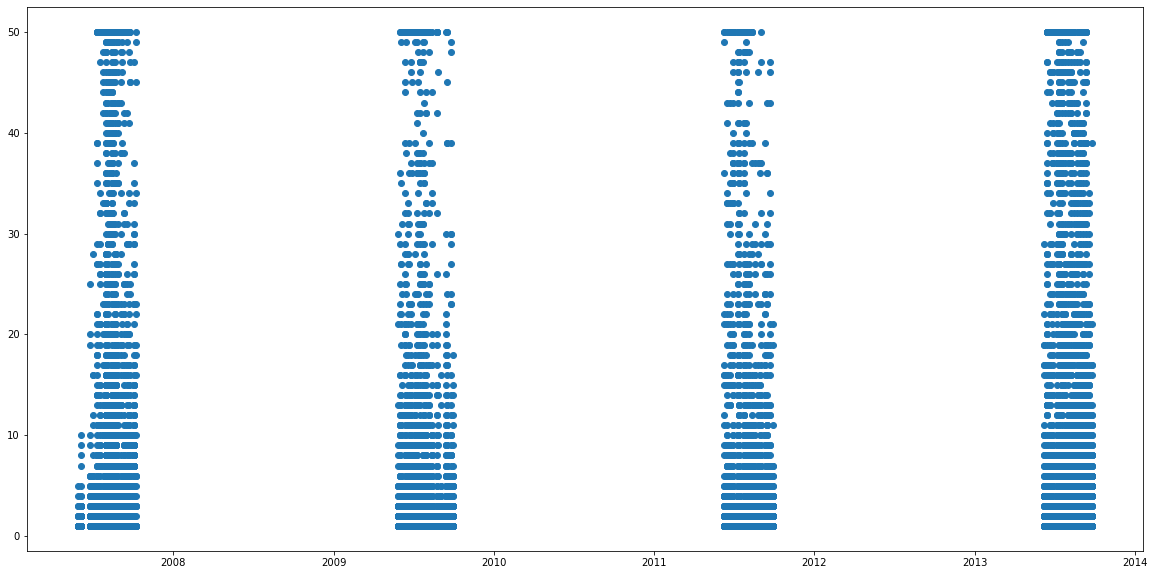

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(y=data[['NumMosquitos']],x=data.index)
plt.show()

In [10]:
data.nunique()

Date                       95
Address                   138
Species                     7
Block                      64
Street                    128
Trap                      136
AddressNumberAndStreet    138
Latitude                  138
Longitude                 138
AddressAccuracy             4
NumMosquitos               50
WnvPresent                  2
year                        4
month                       6
dtype: int64

Since there are many latitude and longitude readings, rounding off lat and longitudes to 2 decimal places would give good scope for analysis.

In [11]:
data['Longitude'] = data[['Longitude']].round(2)
data['Latitude'] = data[['Latitude']].round(2)
data.head(4)

Date                                            Address  \
date                                                                       
2007-05-29 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           Species  Block           Street  Trap  \
date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   

                       AddressNumberAndStreet  Latitude  Longitude  \
date                                                                 
2007-05-29  4100  N OAK PARK AVE, Chicago, IL     41.95     -87.80   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL     41.95     -87.80   
2007-05-29   6200  N MANDELL AVE, Chicago, IL     41.99     -87.77   
2007-05-29    7900  W FOSTER AVE, Chicago, IL     41.97     -87.82   

            AddressAccuracy  NumMosquitos  WnvPresent  year month  
date                                                               
2007-05-29                9             1           0  2007   May  
2007-05-29                9             1           0  2007   May  
2007-05-29                9             1           0  2007   May  
2007-05-29                8             1           0  2007   May

In [12]:
data.nunique()

Date                       95
Address                   138
Species                     7
Block                      64
Street                    128
Trap                      136
AddressNumberAndStreet    138
Latitude                   36
Longitude                  34
AddressAccuracy             4
NumMosquitos               50
WnvPresent                  2
year                        4
month                       6
dtype: int64

In [13]:
spray  = pd.read_csv('C:/Users/Srujan/Documents/Datasets/west_nile/spray.csv',parse_dates=['Date'])
spray.head(4)

Date        Time   Latitude  Longitude
0 2011-08-29  6:56:58 PM  42.391623 -88.089163
1 2011-08-29  6:57:08 PM  42.391348 -88.089163
2 2011-08-29  6:57:18 PM  42.391022 -88.089157
3 2011-08-29  6:57:28 PM  42.390637 -88.089158

In [14]:
spray['Longitude'] = spray[['Longitude']].round(2)
spray['Latitude'] = spray[['Latitude']].round(2)
spray.head(4)

Date        Time  Latitude  Longitude
0 2011-08-29  6:56:58 PM     42.39     -88.09
1 2011-08-29  6:57:08 PM     42.39     -88.09
2 2011-08-29  6:57:18 PM     42.39     -88.09
3 2011-08-29  6:57:28 PM     42.39     -88.09

In [15]:
spray.nunique()

Date           10
Time         8583
Latitude       27
Longitude      30
dtype: int64

In [16]:
weather  = pd.read_csv('C:/Users/Srujan/Documents/Datasets/west_nile/weather.csv',parse_dates=['Date'])
weather

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0           1 2007-05-01    83    50   67     14        51      56    0    2   
1           2 2007-05-01    84    52   68      M        51      57    0    3   
2           1 2007-05-02    59    42   51     -3        42      47   14    0   
3           2 2007-05-02    60    43   52      M        42      47   13    0   
4           1 2007-05-03    66    46   56      2        40      48    9    0   
5           2 2007-05-03    67    48   58      M        40      50    7    0   
6           1 2007-05-04    66    49   58      4        41      50    7    0   
7           2 2007-05-04    78    51    M      M        42      50    M    M   
8           1 2007-05-05    66    53   60      5        38      49    5    0   
9           2 2007-05-05    66    54   60      M        39      50    5    0   
10          1 2007-05-06    68    49   59      4        30      46    6    0   
11          2 2007-05-06    68    52   60      M        30      46    5    0   
12          1 2007-05-07    83    47   65     10        41      54    0    0   
13          2 2007-05-07    84    50   67      M        39      53    0    2   
14          1 2007-05-08    82    54   68     12        58      62    0    3   
15          2 2007-05-08    80    60   70      M        57      63    0    5   
16          1 2007-05-09    77    61   69     13        59      63    0    4   
17          2 2007-05-09    76    63   70      M        60      63    0    5   
18          1 2007-05-10    84    56   70     14        52      60    0    5   
19          2 2007-05-10    83    59   71      M        52      61    0    6   
20          1 2007-05-11    70    51   61      4        42      51    4    0   
21          2 2007-05-11    73    49   61      M        44      51    4    0   
22          1 2007-05-12    64    46   55     -2        36      46   10    0   
23          2 2007-05-12    65    47   56      M        37      46    9    0   
24          1 2007-05-13    69    43   56     -2        33      46    9    0   
25          2 2007-05-13    69    44   57      M        32      46    8    0   
26          1 2007-05-14    90    56   73     15        47      59    0    8   
27          2 2007-05-14    90    54   72      M        45      58    0    7   
28          1 2007-05-15    80    57   69     11        56      61    0    4   
29          2 2007-05-15    82    56   69      M        56      61    0    4   
30          1 2007-05-16    66    44   55     -4        43      48   10    0   
31          2 2007-05-16    64    45   55      M        42      47   10    0   
32          1 2007-05-17    62    43   53     -6        32      43   12    0   
33          2 2007-05-17    61    44   53      M        32      43   12    0   
34          1 2007-05-18    71    42   57     -3        30      46    8    0   
35          2 2007-05-18    70    43   57      M        31      47    8    0   
36          1 2007-05-19    80    56   68      8        39      53    0    3   
37          2 2007-05-19    80    56   68      M        37      53    0    3   
38          1 2007-05-20    69    43   56     -5        40      44    9    0   
39          2 2007-05-20    69    44   57      M        41      45    8    0   
40          1 2007-05-21    80    44   62      1        50      56    3    0   
41          2 2007-05-21    79    46   63      M        50      57    2    0   
42          1 2007-05-22    87    55   71     10        46      58    0    6   
43          2 2007-05-22    87    60   74      M        44      58    0    9   
44          1 2007-05-23    89    60   75     14        49      61    0   10   
45          2 2007-05-23    89    66   78      M        48      61    0   13   
46          1 2007-05-24    88    63   76     14        54      63    0   11   
47          2 2007-05-24    88    66   77      M        53      63    0   12   
48          1 2007-05-25    70    56   63      1        44      53    2    0   
49    

Selecting columns which are neccessary for analysis

In [17]:
weather = weather[['Date','Tavg','Heat','Cool','AvgSpeed']]
weather.ffill()
weather.drop_duplicates(subset='Date',inplace=True)
weather.head()

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date Tavg Heat Cool AvgSpeed
0 2007-05-01   67    0    2      9.2
2 2007-05-02   51   14    0     13.4
4 2007-05-03   56    9    0     11.9
6 2007-05-04   58    7    0     10.8
8 2007-05-05   60    5    0     12.0

merging our original data which spray dataset. This gives a new dataframe which has all the dates from original dataset and the spray time from spray dataset

In [18]:
new = pd.merge(data,spray,how='left',on=['Date','Latitude','Longitude'])
new.head(1000)

Date                                            Address  \
0   2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3   2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4   2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5   2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6   2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7   2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8   2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9   2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   
10  2007-05-29    2100 North Stave Street, Chicago, IL 60647, USA   
11  2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
12  2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
13  2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
14  2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
15  2007-05-29   1100 South Peoria Street, Chicago, IL 60608, USA   
16  2007-05-29      1700 West 95th Street, Chicago, IL 60643, USA   
17  2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
18  2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
19  2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
20  2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
21  2007-05-29  6500 North Oak Park Avenue, Chicago, IL 60631,...   
22  2007-05-29   7500 North Oakley Avenue, Chicago, IL 60645, USA   
23  2007-05-29     1500 North Long Avenue, Chicago, IL 60651, USA   
24  2007-05-29  8900 South Carpenter Street, Chicago, IL 60620...   
25  2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
26  2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
27  2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
28  2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA   
29  2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA   
30  2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
31  2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
32  2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
33  2007-06-05     2500 West Grand Avenue, Chicago, IL 60654, USA   
34  2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
35  2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
36  2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
37  2007-06-05   1100 West Chicago Avenue, Chicago, IL 60642, USA   
38  2007-06-05    2100 North Stave Street, Chicago, IL 60647, USA   
39  2007-06-05    2100 North Stave Street, Chicago, IL 60647, USA   
40  2007-06-05    2200 North Cannon Drive, Chicago, IL 60614, USA   
41  2007-06-05     2200 West 113th Street, Chicago, IL 60643, USA   
42  2007-06-05      1700 West 95th Street, Chicago, IL 60643, USA   
43  2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
44  2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
45  2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
46  2007-06-05  6500 North Oak Park Avenue, Chicago, IL 60631,...   
47  2007-06-05  6500 North Oak Park Avenue, Chicago, IL 60631,...   
48  2007-06-05     1500 North Long Avenue, Chicago, IL 60651, USA   
49  2007-06-05  8900 South Carpenter Street, Chicago, IL 60620...   
50  2007-06-05   9100 West Higgins Avenue, Chicago, IL 60656, USA   
51  2007-06-05  3600 North Pittsburgh Avenue, Chicago, IL 6063...   
52  2007-06-05    7200 North Oketo Avenue, Chicago, IL 60631, USA   
53  2007-06-05  3800 North California Avenue, Chicago, IL 6061...   
54  2007-06-05  4900 West Balmoral Avenue, Chicago, IL 60630, USA   
55  2007-06-05  5800 North Western Avenue, Chicago, IL 60659, USA   
56  2007-06-05  5000 South Central Avenue, Chicago, IL 60638, USA   
57  2007

Creating a new catagorical column which says whether it is sprayed or not on that particular date.
1 resembles it is sprayed
0 resembles it is not sprayed

In [19]:
new['spray'] = 1
new.loc[new['Time'].isnull(),'spray'] = 0
new.drop('Time',axis=1,inplace=True)
new.head()

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL     41.95     -87.80                9   
1  4100  N OAK PARK AVE, Chicago, IL     41.95     -87.80                9   
2   6200  N MANDELL AVE, Chicago, IL     41.99     -87.77                9   
3    7900  W FOSTER AVE, Chicago, IL     41.97     -87.82                8   
4    7900  W FOSTER AVE, Chicago, IL     41.97     -87.82                8   

   NumMosquitos  WnvPresent  year month  spray  
0             1           0  2007   May      0  
1             1           0  2007   May      0  
2             1           0  2007   May      0  
3             1           0  2007   May      0  
4             4           0  2007   May      0

In [20]:
new.shape

(12420, 15)

Merging with weather dataset

In [21]:
new = pd.merge(new,weather,how='left',on='Date')
new.shape

(12420, 19)

In [22]:
new.head(5000)

Date                                            Address  \
0    2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1    2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2    2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3    2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4    2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5    2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6    2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7    2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8    2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9    2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   
10   2007-05-29    2100 North Stave Street, Chicago, IL 60647, USA   
11   2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
12   2007-05-29    2200 North Cannon Drive, Chicago, IL 60614, USA   
13   2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
14   2007-05-29     2200 West 113th Street, Chicago, IL 60643, USA   
15   2007-05-29   1100 South Peoria Street, Chicago, IL 60608, USA   
16   2007-05-29      1700 West 95th Street, Chicago, IL 60643, USA   
17   2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
18   2007-05-29      2200 West 89th Street, Chicago, IL 60643, USA   
19   2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
20   2007-05-29       North Streeter Drive, Chicago, IL 60611, USA   
21   2007-05-29  6500 North Oak Park Avenue, Chicago, IL 60631,...   
22   2007-05-29   7500 North Oakley Avenue, Chicago, IL 60645, USA   
23   2007-05-29     1500 North Long Avenue, Chicago, IL 60651, USA   
24   2007-05-29  8900 South Carpenter Street, Chicago, IL 60620...   
25   2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
26   2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
27   2007-06-05  4100 North Oak Park Avenue, Chicago, IL 60634,...   
28   2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA   
29   2007-06-05    7900 West Foster Avenue, Chicago, IL 60656, USA   
30   2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
31   2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
32   2007-06-05   1500 West Webster Avenue, Chicago, IL 60614, USA   
33   2007-06-05     2500 West Grand Avenue, Chicago, IL 60654, USA   
34   2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
35   2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
36   2007-06-05        1100 Roosevelt Road, Chicago, IL 60608, USA   
37   2007-06-05   1100 West Chicago Avenue, Chicago, IL 60642, USA   
38   2007-06-05    2100 North Stave Street, Chicago, IL 60647, USA   
39   2007-06-05    2100 North Stave Street, Chicago, IL 60647, USA   
40   2007-06-05    2200 North Cannon Drive, Chicago, IL 60614, USA   
41   2007-06-05     2200 West 113th Street, Chicago, IL 60643, USA   
42   2007-06-05      1700 West 95th Street, Chicago, IL 60643, USA   
43   2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
44   2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
45   2007-06-05      2200 West 89th Street, Chicago, IL 60643, USA   
46   2007-06-05  6500 North Oak Park Avenue, Chicago, IL 60631,...   
47   2007-06-05  6500 North Oak Park Avenue, Chicago, IL 60631,...   
48   2007-06-05     1500 North Long Avenue, Chicago, IL 60651, USA   
49   2007-06-05  8900 South Carpenter Street, Chicago, IL 60620...   
50   2007-06-05   9100 West Higgins Avenue, Chicago, IL 60656, USA   
51   2007-06-05  3600 North Pittsburgh Avenue, Chicago, IL 6063...   
52   2007-06-05    7200 North Oketo Avenue, Chicago, IL 60631, USA   
53   2007-06-05  3800 North California Avenue, Chicago, IL 6061...   
54   2007-06-05  4900 West Balmoral Avenue, Chicago, IL 60630, USA   
55   2007-06-05  5800 North Western Avenue, Chicago, IL 60659, USA   
56   2007-06-05  5000

In [23]:
new.set_index('Date',inplace=True)
new.head(4)

Address  \
Date                                                            
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           Species  Block           Street  Trap  \
Date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   

                       AddressNumberAndStreet  Latitude  Longitude  \
Date                                                                 
2007-05-29  4100  N OAK PARK AVE, Chicago, IL     41.95     -87.80   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL     41.95     -87.80   
2007-05-29   6200  N MANDELL AVE, Chicago, IL     41.99     -87.77   
2007-05-29    7900  W FOSTER AVE, Chicago, IL     41.97     -87.82   

            AddressAccuracy  NumMosquitos  WnvPresent  year month  spray Tavg  \
Date                                                                            
2007-05-29                9             1           0  2007   May      0   74   
2007-05-29                9             1           0  2007   May      0   74   
2007-05-29                9             1           0  2007   May      0   74   
2007-05-29                8             1           0  2007   May      0   74   

           Heat Cool AvgSpeed  
Date                           
2007-05-29    0    9      6.5  
2007-05-29    0    9      6.5  
2007-05-29    0    9      6.5  
2007-05-29    0    9      6.5

As you can see in the below plot, as the average temperature increases the number of mosquitoes are increasing. This means that west nile mosquitoes are more adaptive to high temperatures.

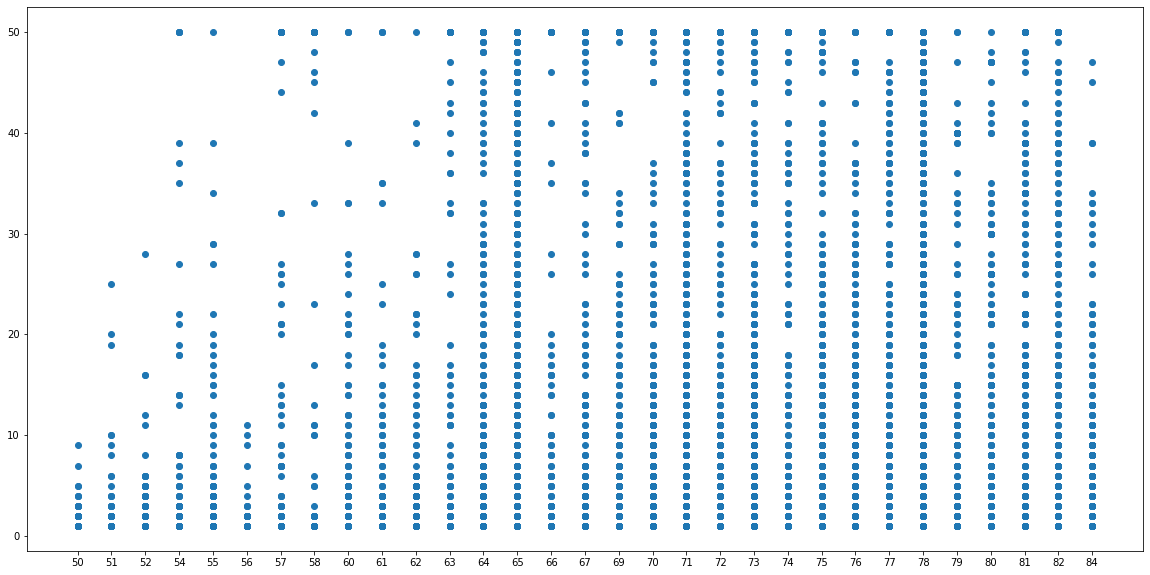

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(x=new['Tavg'].sort_values(),y=new['NumMosquitos'])

From the below plot we can come to assume that wind speed doesn't effect the mosquitoes very much. At least 20 mosquitoes are trapped at all wind speeds.

For very high wind speed above 10.9, number of mosquitoes trapped have decreased.

Note: The indexes are not in order.

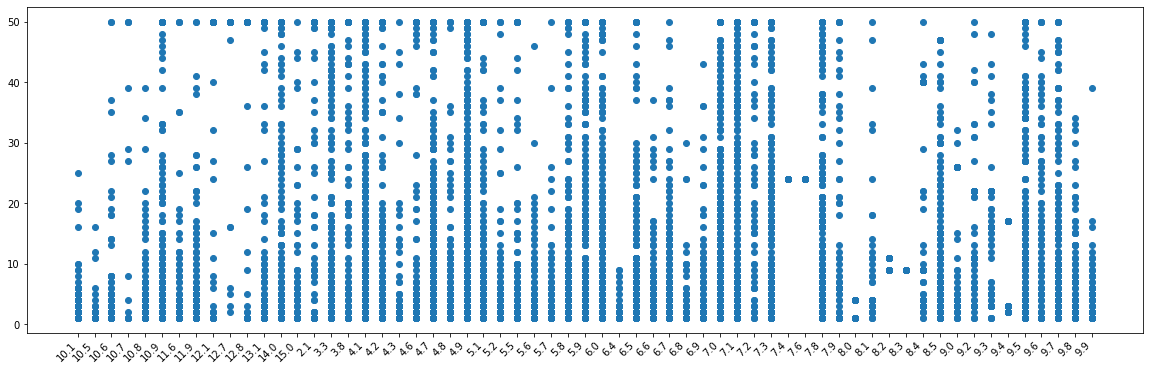

In [25]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x=new['AvgSpeed'].sort_values(ignore_index=True),y=new['NumMosquitos'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

Heat and Temperature are two different metrics. We can notice that if the heat is more or as the heat increases number of trapped mosquitoes are less.

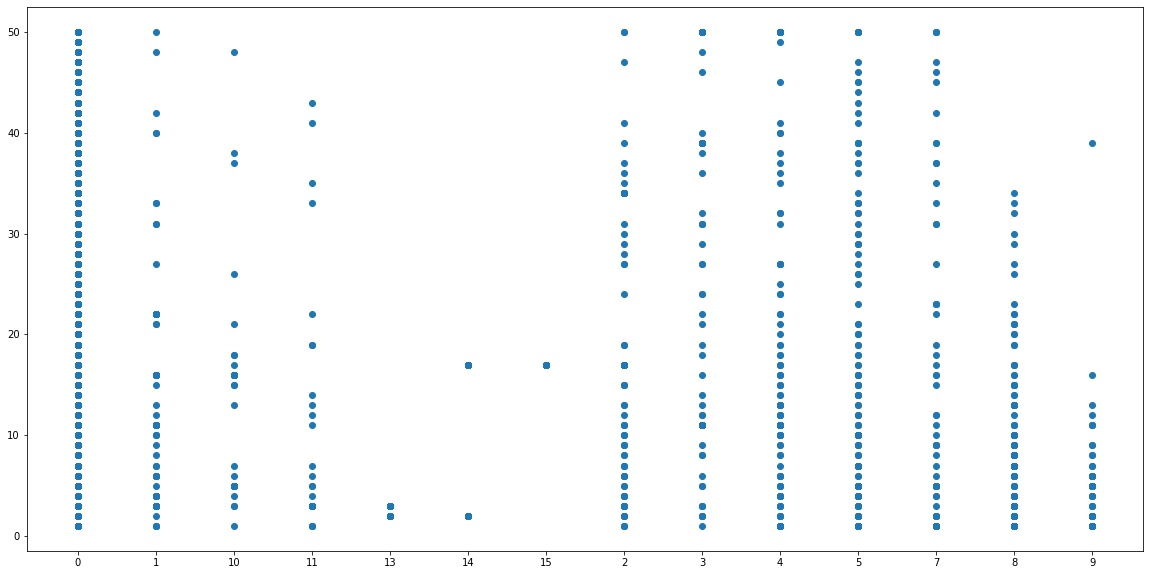

In [26]:
plt.figure(figsize=(20,10))
plt.scatter(x=new['Heat'].sort_values(),y=new['NumMosquitos'])

From the below plot we can conclude that cool weather doesn't effect the west nile mosquitoes much. They sustain anyhow.

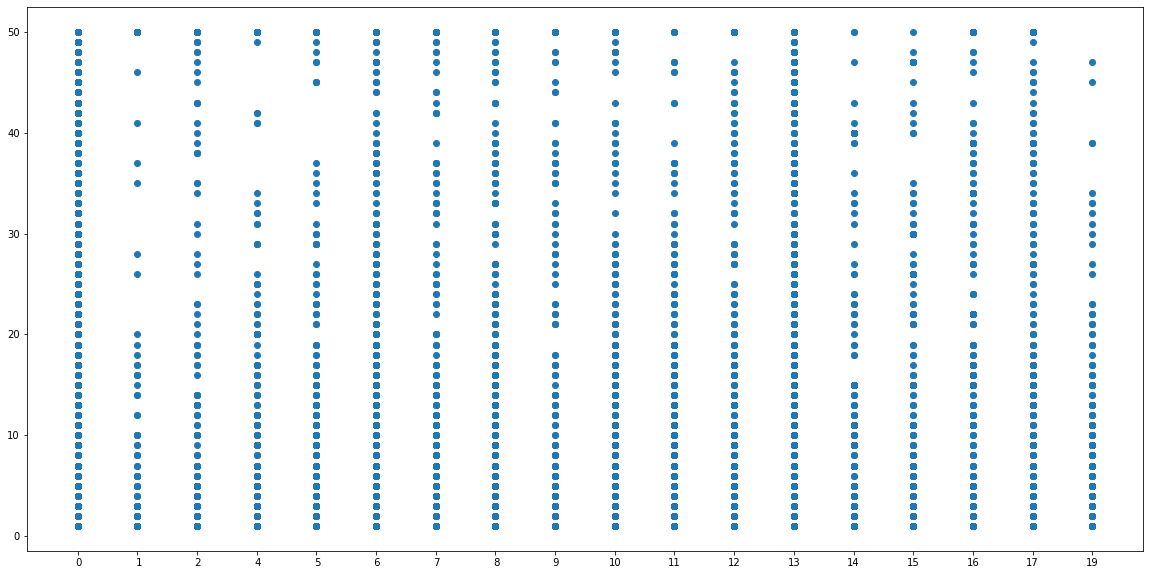

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(x=new['Cool'].sort_values(),y=new['NumMosquitos'])

The spraying is done since 2011 and only in july and august. Below plot shows that when the spraying the done the number of mosquitoes have decreased.

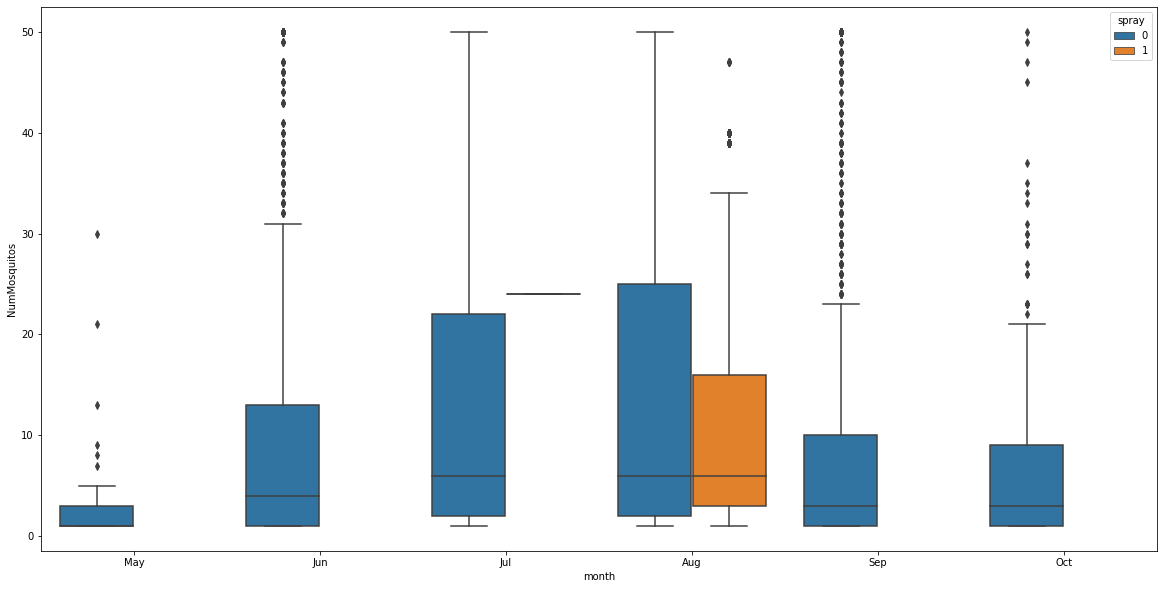

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x='month',y='NumMosquitos',data=new,hue='spray')